In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import torch
print(os.getpid())

3837794


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

# Option 1: quickly visualize one field of view 

In [10]:
#image_folder = r'/lab/weissman_imaging/puzheng/4T1Tumor/20230928-4T1tumor_F170section4_0927MF2-mCherry/H0M1'
image_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1'
#image_folder = r'Y:/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H2M3'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
if len(image_basenames) < 20:
    print(image_basenames)
else:
    print(image_basenames[-20:])
    

/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1
['Conv_zscan_62.dax', 'Conv_zscan_63.dax', 'Conv_zscan_64.dax', 'Conv_zscan_65.dax', 'Conv_zscan_66.dax', 'Conv_zscan_67.dax', 'Conv_zscan_68.dax', 'Conv_zscan_69.dax', 'Conv_zscan_70.dax', 'Conv_zscan_71.dax', 'Conv_zscan_72.dax', 'Conv_zscan_73.dax', 'Conv_zscan_74.dax', 'Conv_zscan_75.dax', 'Conv_zscan_76.dax', 'Conv_zscan_77.dax', 'Conv_zscan_78.dax', 'Conv_zscan_79.dax', 'Conv_zscan_80.dax', 'Conv_zscan_81.dax']


In [11]:
sel_fov_id = 50

In [12]:
image_filename = os.path.join(image_folder, image_basenames[sel_fov_id])
print(image_filename)
# load image
daxp = dax_process.DaxProcesser(
    image_filename,
    CorrectionFolder=r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500', # Merscope01
    #CorrectionFolder=r'\\wi-bigdata\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor', # Storm6
)
daxp._load_image()

# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_50.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_50.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_50_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.533s.


<IPython.core.display.Javascript object>


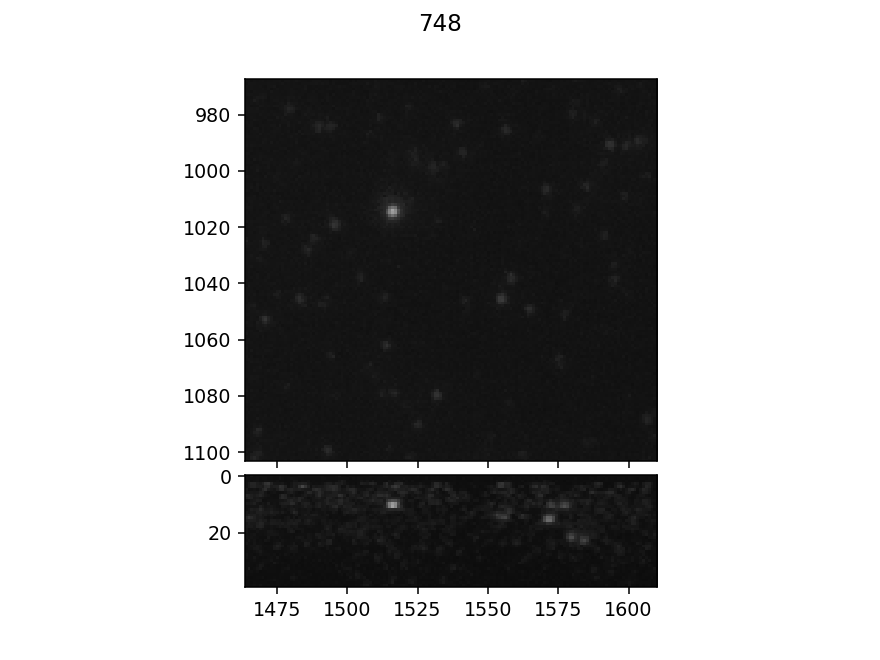

In [14]:
%matplotlib widget
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels][1:], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[200,5000],
    )
f.show()

In [26]:
daxp._FindGlobalPosition(daxp.filename)

array([-2600.55, -3156.65])

In [27]:
# Load reference
ref_folder = os.path.join(os.path.dirname(image_folder), 'H0M1')
#ref_folder = r'E:\Data\20231004-4T1tumor_F170section3_0927MF2-mCherry\H0M1'

ref_image_filename = os.path.join(ref_folder, os.path.basename(image_filename))
print(ref_image_filename)
ref_daxp = dax_process.DaxProcesser(ref_image_filename,
    CorrectionFolder=daxp.correction_folder,
    #FiducialChannel='405',
    #Channels=['748', '637', '545', '477', '405'],
)
ref_daxp._load_image()
# corrections
#ref_daxp._corr_illumination()
#ref_daxp._corr_bleedthrough()
#ref_daxp._corr_hot_pixels()

/lab/weissman_imaging/puzheng/4T1Tumor/20230928-4T1tumor_F170section4_0927MF2-mCherry/H0M1/Conv_zscan_010.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/4T1Tumor/20230928-4T1tumor_F170section4_0927MF2-mCherry/H0M1/Conv_zscan_010.dax
- New save file: /lab/weissman_imaging/puzheng/4T1Tumor/20230928-4T1tumor_F170section4_0927MF2-mCherry/H0M1/Conv_zscan_010_processed.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 3.140s.


In [28]:
daxp._calculate_drift(RefImage=ref_daxp.im_477, FiducialChannel='477')

+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 1.000e-02  5.869e+01 -6.010e+00] in 0.916s.
-- drift 1: [ 1.000e-02  5.858e+01 -5.980e+00] in 0.920s.
-- drift 2: [ 0.   58.74 -6.13] in 0.931s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


(array([ 6.66666667e-03,  5.86700000e+01, -6.04000000e+00]), 1)